# Discrete Fourier Transform

In [101]:
import numpy as np
import matplotlib.pyplot as plt

%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Links:
* [3blue1brown](https://www.youtube.com/watch?v=spUNpyF58BY)
* https://ccrma.stanford.edu/~jos/st/Introduction_DFT.html
* https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
* http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT4/node3.html
* https://math.stackexchange.com/questions/275115/why-do-fourier-transforms-use-complex-numbers

First note that we are dealing with the **discrete** Fourier Transform here. 

The DFT maps a sequence of equally spaced samples of a signal (in what is called configuration space) into a sequence (of the same length) of complex valued numbers representing the power and phase of those frequencies.

Mathematically:

$$
X(\omega_{k}) = \sum_{n=0}^{N-1} x(t_n)\ e^{-i \omega_{k} t_n}
$$

note also the inverse:

$$
x(t_n) = \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})\ e^{i \omega_{k} t_n}
$$

where

* $X(\omega_k)$: the spectrum of the signal (output of the dfft) at the kth frequnecy (or mode), $0 < k < N-1$.
* $x(t_n)$: The value of the signal at the nth timestep, $0 < n < N-1$.
* $N$: the number of samples.
* $T$: the sampling interval (secs).
* $NT$: is therefore the total time of the signal (secs).
* $t_n$: the time of the nth sample. $= Tn$ (secs).

It is not immediately obvious which $N$ frequencies we should use. Let's define $\Omega = \frac{2 \pi}{NT}$ (rad/sec).
From this we get $\omega_k = k \Omega$. What are some of these frequencies and what do they mean?
* $k = 0$, $\omega_k = 0$: The non varying part of the signal
* $k = 1$, $\omega_k = \frac{2 \pi}{NT}$. The part of the signal that varies once (one full revolution, $2 \pi$) over the total time ($NT$).
* $k = 2$, $\omega_k = \frac{4 \pi}{NT}$. The part of the signal that varies twice (two full revolutions, $4 \pi$) over the total time ($NT$).
* $k = \frac{N}{2}$, $\omega_k = \frac{N \pi}{NT}$. The part of the signal with the Nyquist frequency (varies N/2 times over the total time).

In general $\omega_k$ does k full revolutions over the sample (up to $k = \frac{N}{2}$). We'll get to higher k later...

With all this in mind, we can rewrite the dft with $\omega_{k} = \frac{2 \pi k}{NT}$ and $t_n = Tn$
$$
X(\omega_{k}) = \sum\limits_{n=0}^{N-1} x(t_n)\ e^{\frac{-i 2 \pi n k}{N}}
$$

Let's now think about a couple of the outputs. Starting with $k = 0$.
$$
X(\omega_{0}) = \sum\limits_{n=0}^{N-1} x(t_n)
$$

This is just the sum of the samples. As we said before - the non varying part of the signal. Now $k = 1$.

$$
X(\omega_{1}) = \sum\limits_{n=0}^{N-1} x(t_n)\ e^{\frac{-i 2 \pi n}{N}}
$$

Remember that $e^{ix} = cos(x) + i sin(x)$ so we can re-write this as

$$
X(\omega_{1}) = \sum\limits_{n=0}^{N-1} x(t_n)[cos(\frac{2 \pi n}{N}) + i sin(\frac{2 \pi n}{N})]
$$

Therefore the real part will be large if $x(t)$ looks like a single period of a cosine function. The imaginary part will be large if it looks like a single period of a sine function!
The absolute magnitude of $X(\omega_{1})$ therefore tells us how much information in the signal is a single period sin like wave.
The ratio between the imaginary and real parts tells us whether it looks more like a sin or cosine wave - what the phase is.
See [here](https://math.stackexchange.com/questions/275115/why-do-fourier-transforms-use-complex-numbers) for a nice explanation of this.

Let's consider what the dft for a simple function might look like. The simplest I can think of is a cos wave that has a single period over our interval.
We'll assume that this is well sampled.

$$
x(t_n) = cos(\omega_1 t)
$$

Naively, I would think that this would just be 0 everywhere except the real part of $k = 1$. However this is not true. The $k = N-1$ frequency has a similar amount of power in the real part as $k = 1$. Why?

**Mathematically**

One way to get at this is to realise that a corrolary of $e^{ix} = cos(x) + i sin(x)$ is

$$
cos(\omega t) = \frac{1}{2}(e^{i \omega t} + e^{-i \omega t})
$$

therefore

$$
X(\omega_{1}) 
= \sum\limits_{n=0}^{N-1} e^{i \omega_1 t_n} e^{\frac{-i 2 \pi n}{N}} 
= \sum\limits_{n=0}^{N-1} \frac{1}{2} e^{\frac{i 2 \pi n}{N}} e^{\frac{-i 2 \pi n}{N}} 
= \frac{N}{2}
$$

and

$$
X(\omega_{N-1}) 
= \sum\limits_{n=0}^{N-1} e^{i \omega_{1} t_n} e^{\frac{-i 2 \pi n (N-1)}{N}} 
= \sum\limits_{n=0}^{N-1} \frac{1}{2} e^{\frac{-i 2 \pi n}{N}} e^{\frac{-i 2 \pi n (N-1)}{N}}
= \sum\limits_{n=0}^{N-1} \frac{1}{2} e^{\frac{-i 2 \pi n}{N}(1 + N - 1)}
= \sum\limits_{n=0}^{N-1} \frac{1}{2} e^{-i 2 \pi n}
= \frac{N}{2}
$$
because $cos(2 \pi n) = 1$.

**Intuitively**

The $(N-1)$ frequency makes $(N-1)$ full revolutions during our signal. Thus, at each sampling period it is slightly behind ($\frac{2\pi}{n}$) the phase it was at the one before.
This means that it starts off positive (like the cos function). After $\frac{n}{4}$ samples it is $\frac{n}{4}\frac{2\pi}{n} = \frac{\pi}{2}$ behind and so goes negative, *just as the cos function goes negative*! And so on. This is why it has a lot of power.

Another way to think of this is: while each sample the cos function is advancing in phase by $\frac{2\pi}{n}$, the $(N-1)$ frequency is falling behind in phase *by the same amount*.
However, this is just the same as having a negative frequency of $\omega$ (the negative of the frequency of the cos function). But, $cos(\omega t) == cos(-\omega t)$. It seems to me that this is degenerate.

For this reason, the frequencies are often not referred to a $k \in [0, N-1]$ but rather $k \in [-\text{floor}(\frac{N-1}{2}), \text{floor}(\frac{N}{2})]$.
However, note that the output doesn't appear to ever be ordered this way (e.g. [numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fft.fft.html#numpy.fft.fft)). You still order them in the $0 \rightarrow N-1$ way, you just call the high terms the negative.
As this is a bit confusing, some concrete examples:
* $n = 4$, $k = 0, 1, 2, -1$
* $n = 5$, $k = 0, 1, 2, -2, -1$

At this point you might be wondering what the point of these high order terms are... I know I am. Why not just fold them back into the low order terms if $k(x) = k(N-x)$?
However, this is not the case if the input is complex.

# Nyquist frequency

The Nyquist frequency ($\omega_{c}$) is the highest frequency that can be represented by something sampled at intervals of $T$ seconds.

$$
\omega_{c} = \frac{1}{2T} = \frac{f_{sampling}}{2}
$$

Any signal from frequencies higher than this will be aliased to a lower frequency.

Note that the 0.75 sampling undersamples the func. But also note that it has the same power (amplitude) as the 0.25 sampling


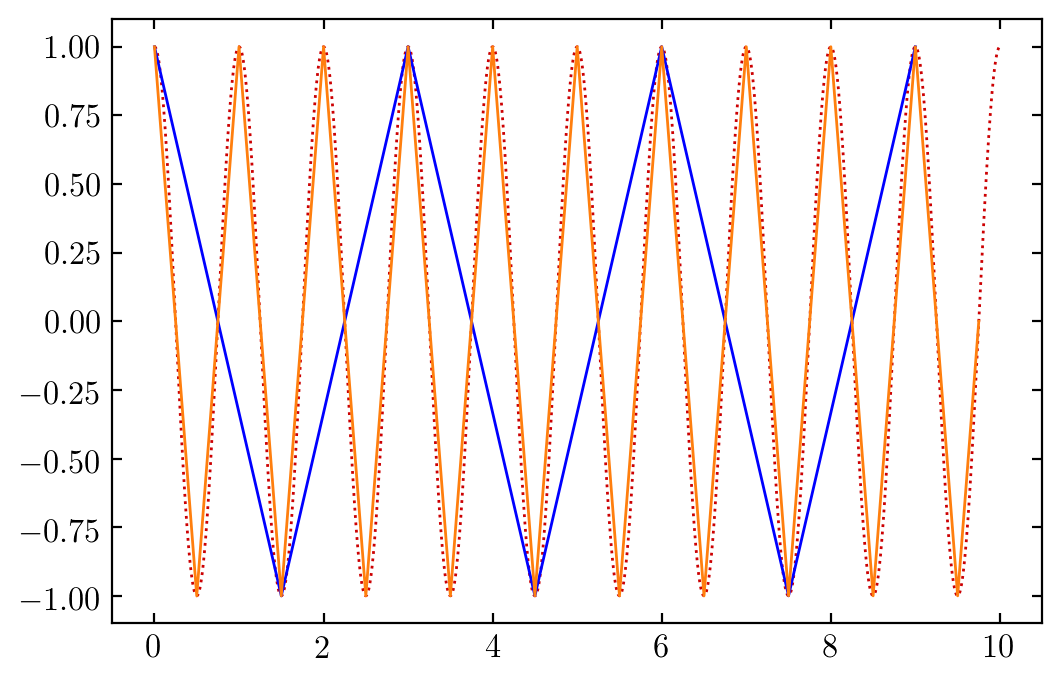

In [53]:
# Let's create a function with period 1
cos = lambda t: np.cos(t * 2 * np.pi)
lim = 10

def plot_sampled(sampling_rate, ax=None):
    if ax is None:
        _, ax = plt.subplots()
        ax.plot(np.linspace(0, lim, 10000), cos(np.linspace(0, lim, 10000)), ls="dotted")

    samples = np.arange(int(lim / sampling_rate)) * sampling_rate
    y = cos(samples)

    ax.plot(samples, y)
    return ax

ax = plot_sampled(0.75)
plot_sampled(0.25, ax)
print("Note that the 0.75 sampling undersamples the func. But also note that it has the same power (amplitude) as the 0.25 sampling")

# Aliases

We know from the Nyquist Frequncy that 

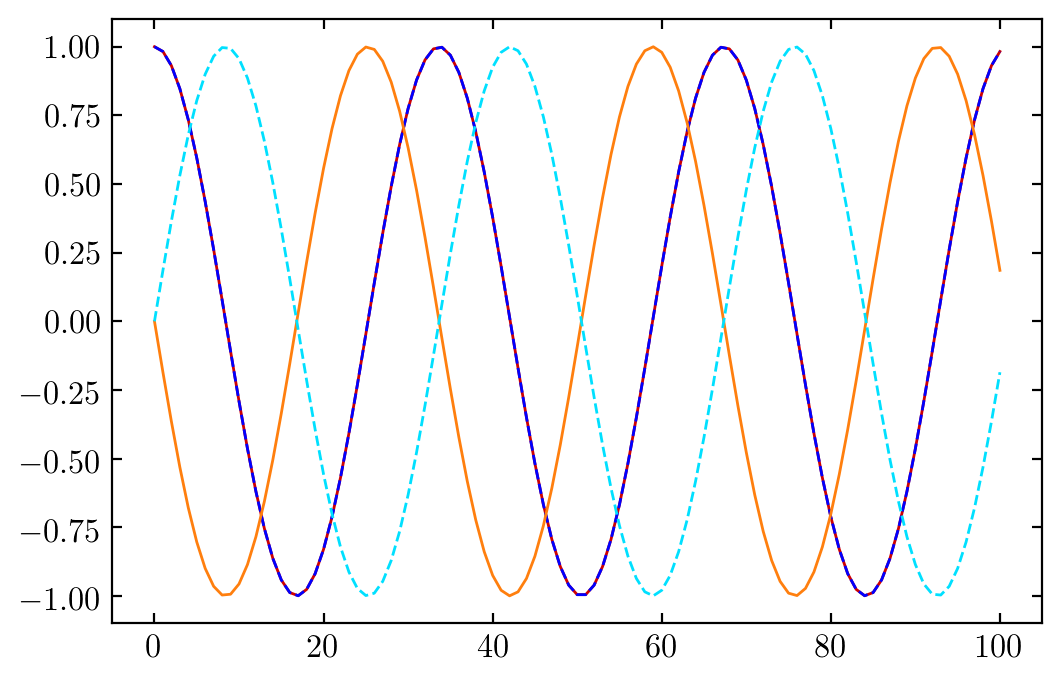

In [118]:
n = np.arange(101)    
N = len(n)
k = 3

# Omega(N-k) has the negative frequency of Omega(k)
# Though you can't actually see this is in cos, as cos(wt) = cos(-wt)
_, ax = plt.subplots()
ax.plot(np.cos((k) * 2 * np.pi * n / N))
ax.plot(np.cos((N-k) * 2 * np.pi * n / N), linestyle="dashed")

# You can see it in sin, as sin(wt) = -sin(-wt)
ax.plot(np.sin((N-k) * 2 * np.pi * n / N))
ax.plot(np.sin((k) * 2 * np.pi * n / N), linestyle="dashed")

# What's the power?

We have talked about the power in a mode being the absolute value of the result of the DFT. But what exactly does this number mean?

We know for the zeroth (non-varying) mode, the value is the sum of the samples (or mean * number).

For the first mode, the value is the amplitude of the sine like function that fits it * number of points / 2 (because half the power is in the negative frequency).

# Examples

In [138]:
def example_ft(signal, noise=None, comp=False):
    _, axes = plt.subplots(1, 2)
    if noise is not None:
        axes[0].plot(signal, zorder=10, color="blue")
        signal += noise
        
    ft = np.fft.fft(signal)
    
    axes[0].plot(np.real(signal))
    axes[1].plot(np.abs(ft), label="power")
    if comp:
        axes[1].plot(np.real(ft), label="real")
        axes[1].plot(np.imag(ft), label="imag")
        axes[1].legend()

## Constant

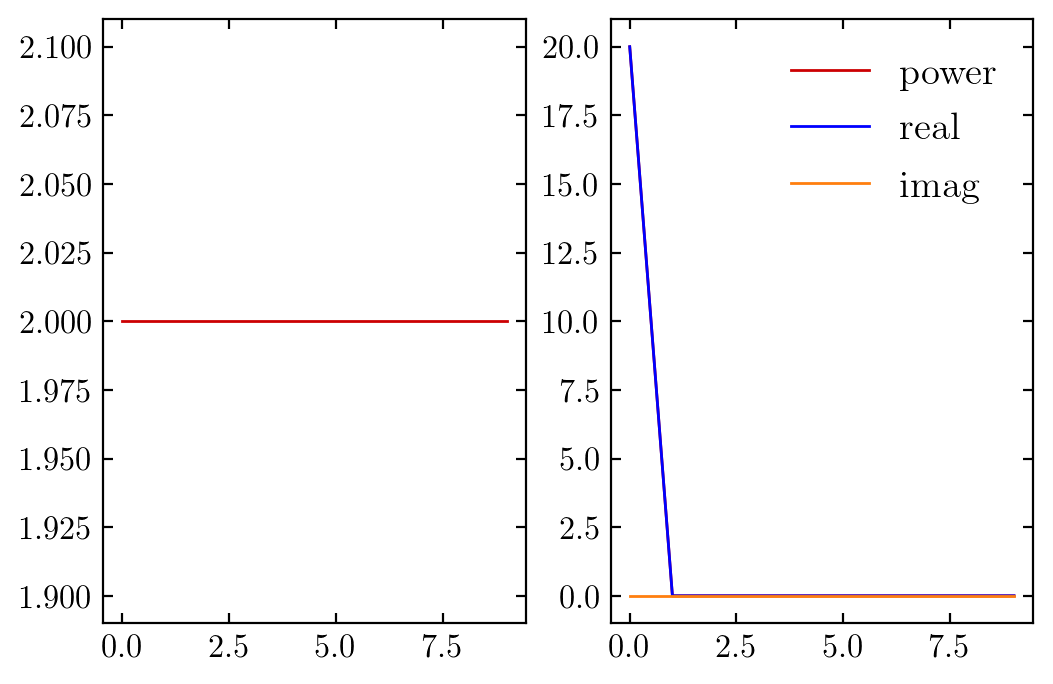

In [131]:
# No periodicity. As expected the first term just contains the sum.
example_ft(np.ones(10) * 2, comp=True)

## Single period 

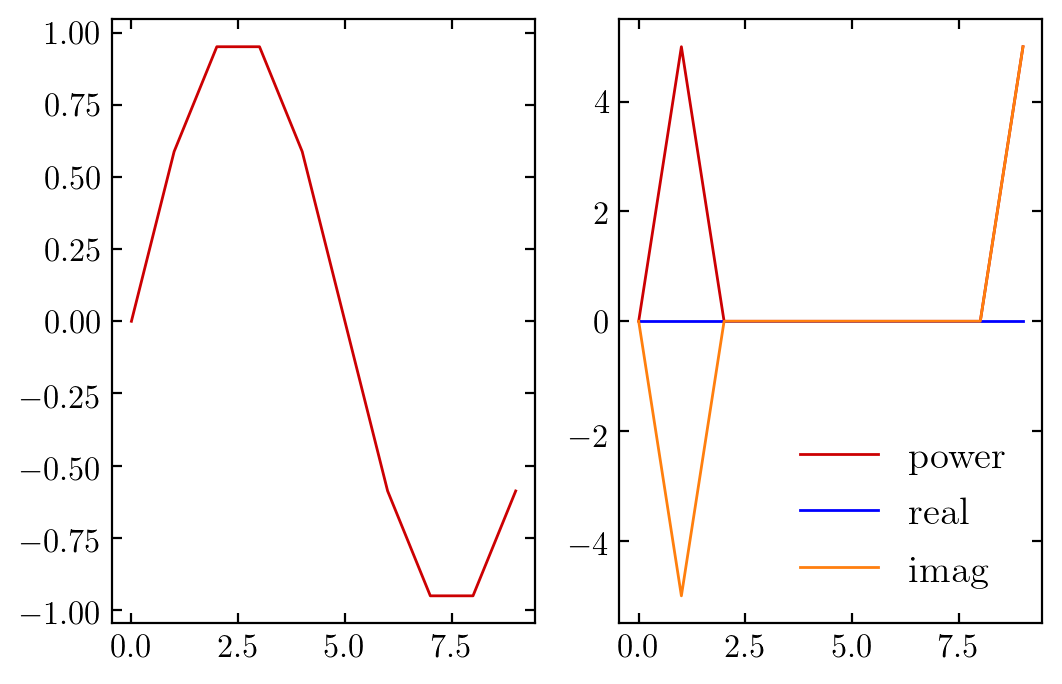

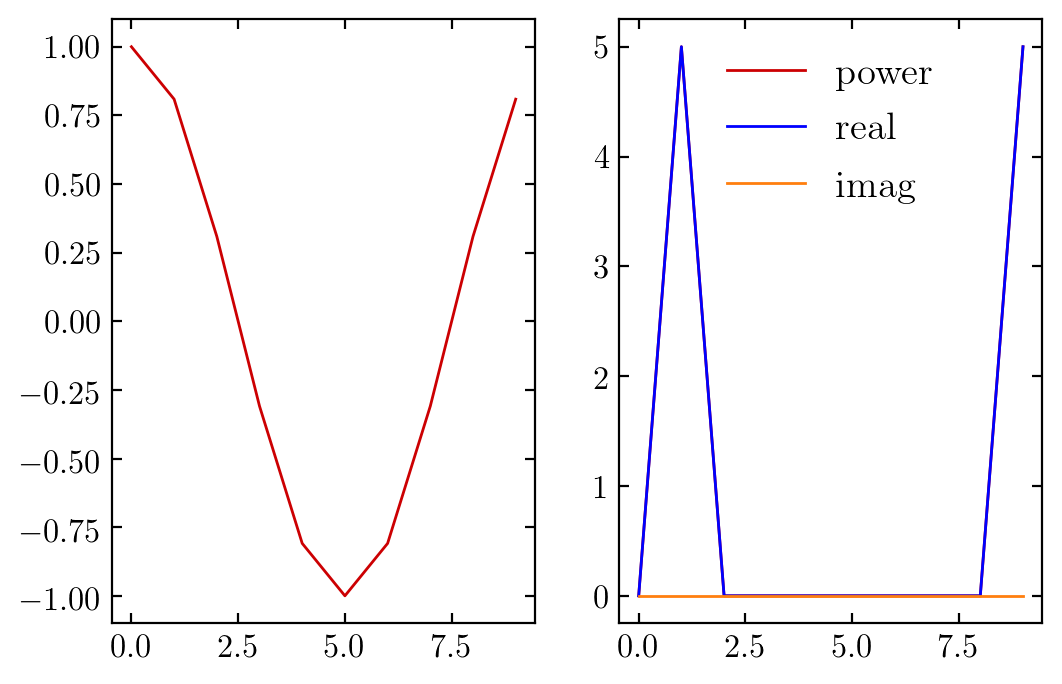

In [135]:
# A single sin wave. Almost all power in the first mode and its negative
# Note how it doesn't quite do a full revolution, which means it does... The next point would be the first in the second period,
# and so if it were included (replace n with (n-1) in the denominator) it would not be a single period function. 
n = 10
example_ft(np.sin(np.arange(n) * (2 * np.pi / n)), comp=True)
example_ft(np.cos(np.arange(n) * (2 * np.pi / n)), comp=True)

## Slightly more than a single period

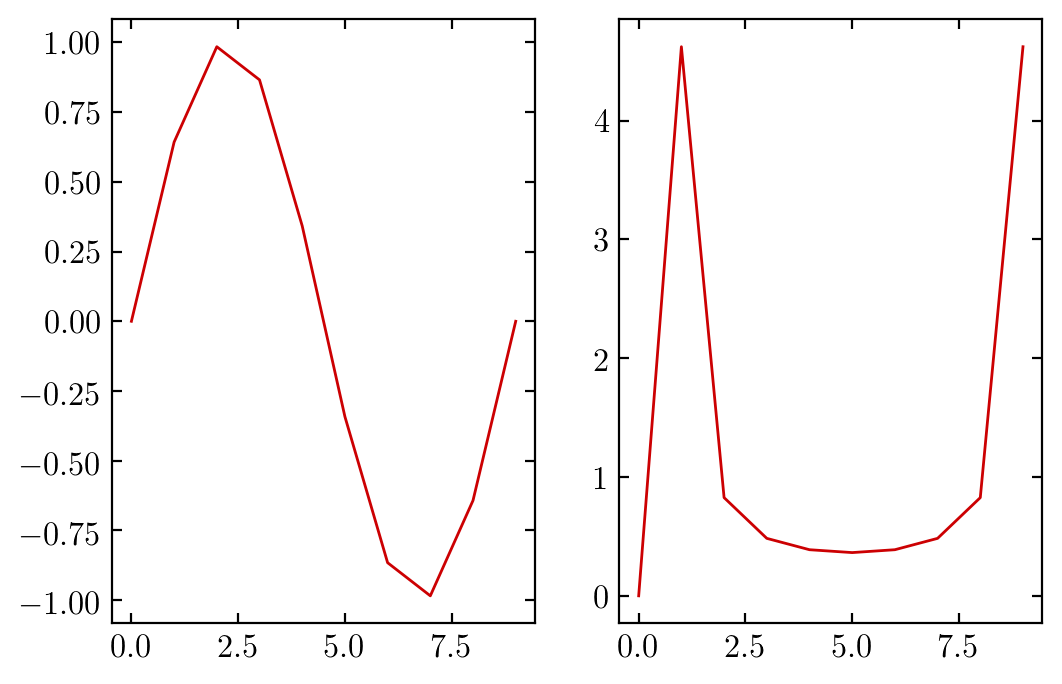

In [134]:
# Slightly more than a single period. Most power in the 1st mode, but some elsewhere now.
n = 10
example_ft(np.sin(np.arange(n) * (2 * np.pi / (n-1))))

## Noisy combination of modes

(-14.752550079216512+0j)


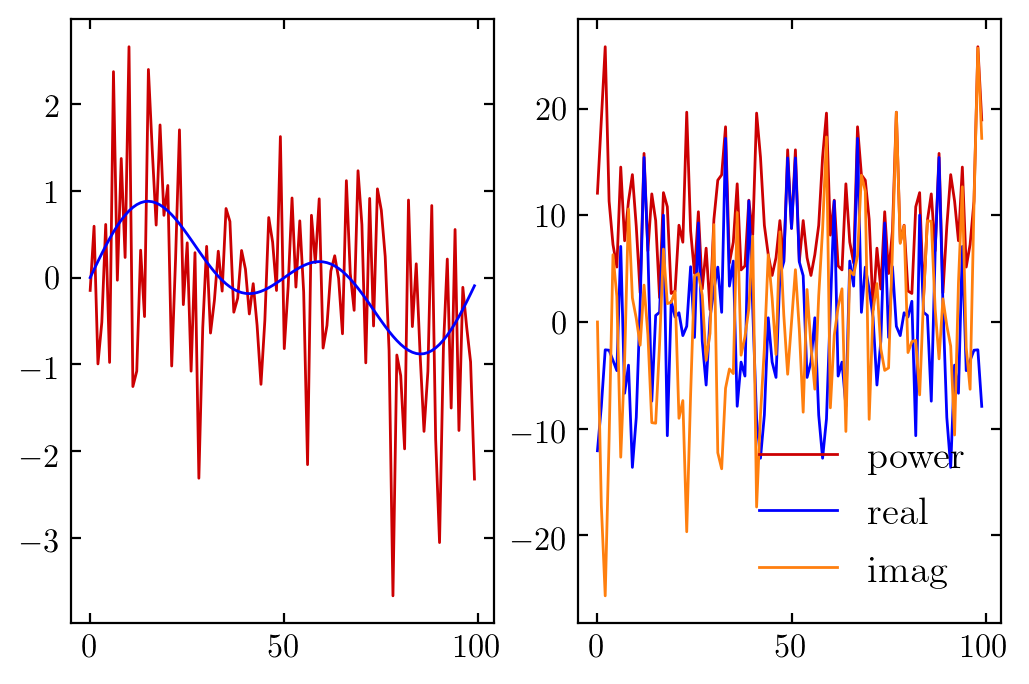

In [142]:
# Note how even though the noisy is on the order of the scale of the function, we still clearly pick out the modes
n = 100
example_ft( 
    0.5 * np.sin(np.arange(n) * (2 * np.pi / n)) + 
    0.5 * np.sin(np.arange(n) * 2 * (2 * np.pi / n)),
    noise = np.random.normal(size=n),
    comp=True,
)

## Complex input

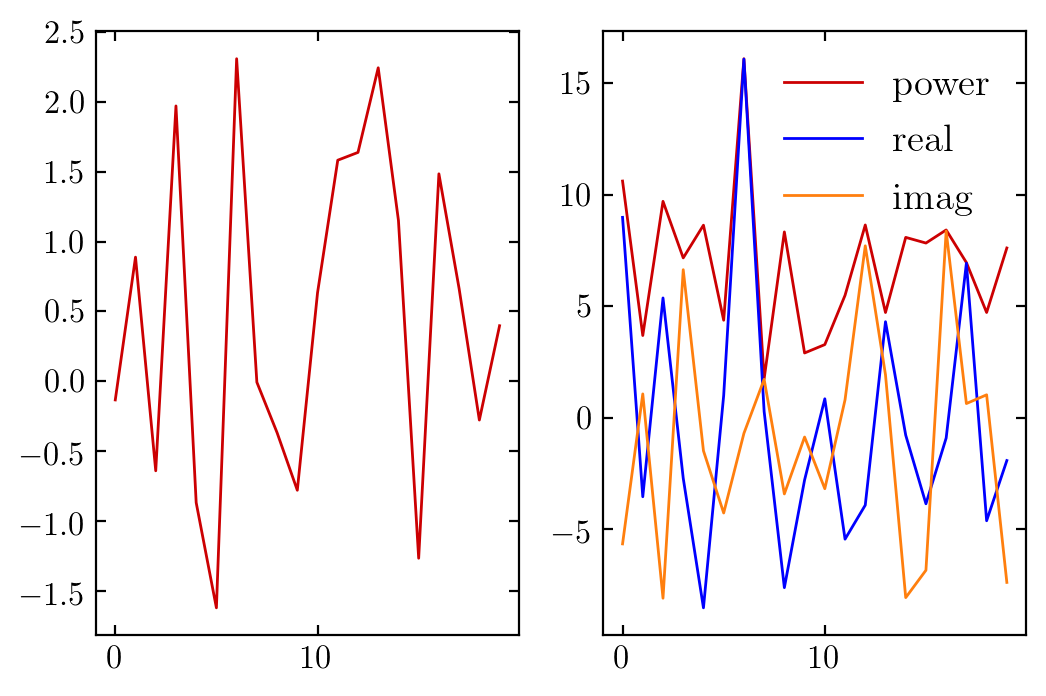

In [137]:
# Note how the spectrum is no longer mirrored
n = 20
signal = np.random.normal(size=n) + 1j * np.random.normal(size=n)
example_ft(signal, comp=True)

# Simple Fourier Transform

A simple manual FFT

Not bad!


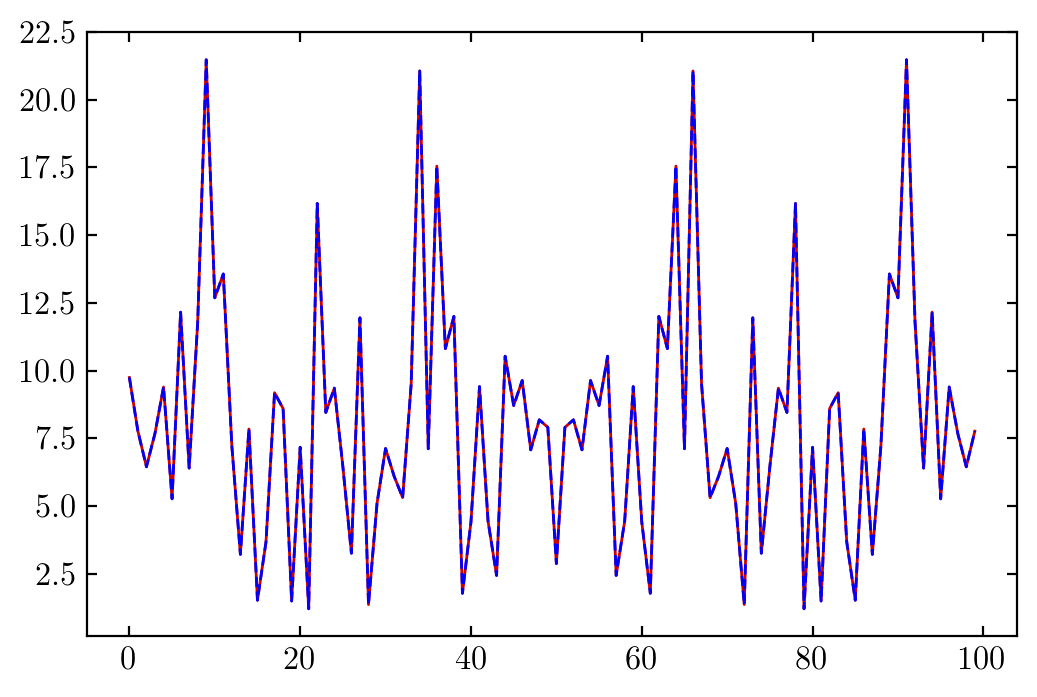

In [100]:
def sft(signal):
    spectrum = np.zeros(len(signal), dtype=np.complex)
    n = np.arange(len(spectrum))
    N = len(spectrum)
    
    for k in range(N):
        spectrum[k] = np.complex(
            np.dot(signal, np.cos(k * 2 * np.pi * n / N)),
            np.dot(signal, np.sin(k * 2 * np.pi * n / N))
        )

    return spectrum

n = 100
#signal = np.ones(n)
#signal = np.sin(np.arange(n) * (2 * np.pi / (n-1)))
signal = np.random.normal(size=n)

spectrum = sft(signal)
true_spectum = np.fft.fft(signal)

_, ax = plt.subplots()
ax.plot(np.abs(spectrum))
ax.plot(np.abs(true_spectum), linestyle="dashed")
print("Not bad!")

# IDFFT

We just introduced the inverse at the start. Let's look at it in detail.

$$
x(t_n) = \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})\ e^{i \omega_{k} t_n}
$$

As before, $\omega_{k} = \frac{2 \pi k}{NT}$ and $t_n = Tn$ and therefore:

$$
x(t_n) = \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})\ e^{\frac{i 2 \pi n k}{N}}
$$

Let's think about some of the outputs. This is harder than for the dfft because there we assumed that the signal was real. The modes are complex so we need to think about that...

For $n = 0$ (the first sample).

$$
x(t_0) = \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})
$$

It is just the sum of all the modes divided by the number of samples. This gives us the nice result that the sum of the imaginary parts of the spectrum must be 0 if the first point is not complex.

Not fully sure of an intuitive reason why. Now $n = 1$.

$$
x(t_1) 
= \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})\ e^{\frac{i 2 \pi k}{N}}
= \frac{1}{N} \sum_{k=0}^{N-1} X(\omega_{k})\ [cos(\frac{2 \pi k}{N}) + i sin(\frac{2 \pi k}{N})]
$$

It is the sum of all modes 